In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = pd.read_pickle('treino.pkl.gz')

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20, 8)

In [3]:
# dividir dados entre as maiores agencias, alocar todas as agencias pequenas sob o label 'outras'
print(df['agencia'].isnull().sum())
print(len(df['agencia'].unique()))

0
82


In [4]:
def categorize_agency(x, top_indexes):
    if x in top_indexes:
        return str(x)
    else:
        return 'other'
    
top_agency_indexes = df['agencia'].value_counts().head(14).index.tolist()    
df['agencia'] = df['agencia'].apply(lambda x: categorize_agency(x, top_agency_indexes))

In [5]:
# aproximadamente metade dos dados foram alocados sob o label 'other'

len(df.loc[df['agencia'] == 'other']) / len(df)

0.5467207797429807

In [6]:
pd.crosstab(df['agencia'], df['default'])

default,0,1
agencia,,
1,3917,675
136,4890,1369
146,3069,1198
152,3447,522
16,3694,1474
18,3067,941
19,3934,744
2,8516,1965
3,6147,1272


In [7]:
est, p, dof, exp = chi2_contingency(pd.crosstab(df['agencia'], df['default']))
print(est)
print(chi2.ppf(q = 0.95, df = dof))

1156.4643153036002
23.684791304840576


In [8]:
agency_def_prop = []
for ag in df['agencia'].unique():
    agency_def_prop.append([round(df.loc[df['agencia'] == ag, 'default'].value_counts(1).iloc[1], 2), str(ag)])

agency_def_prop.sort()

ag_props = [i[0] for i in agency_def_prop]
ag_ticks = [i[1] for i in agency_def_prop]

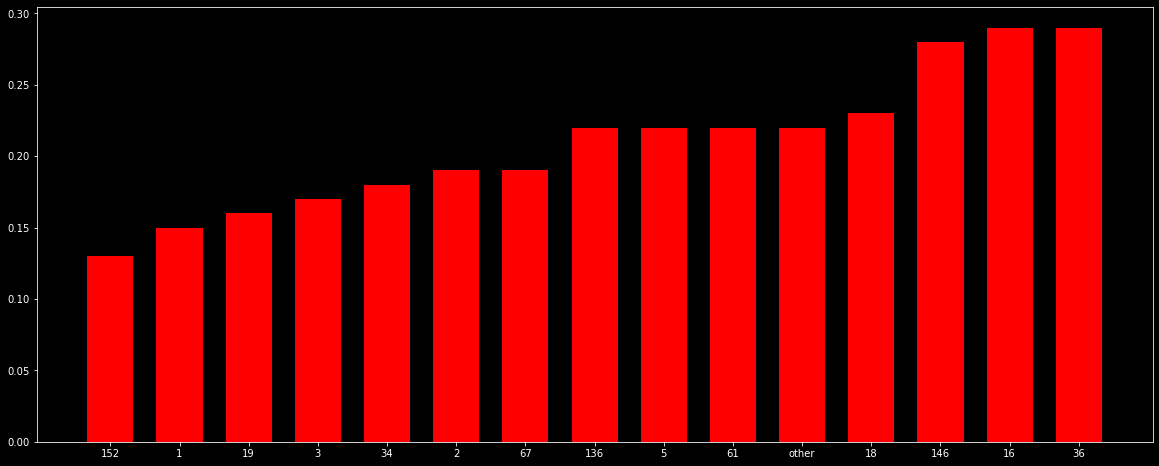

In [9]:
pos = 0
tick_pos = []
for i in ag_props:
    plt.bar([pos], [i], width = 0.1, color = 'red')
    tick_pos.append(pos)
    pos += 0.15
plt.xticks(ticks = tick_pos, labels = ag_ticks)
plt.show()

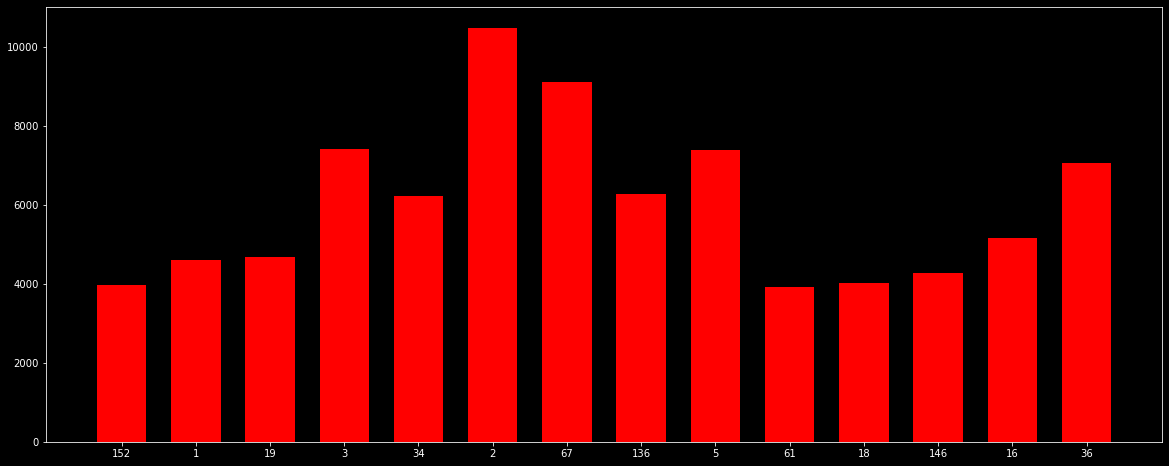

In [10]:
# quantos dados compõe cada grupo ? (com exceção de 'other', que consiste em metade dos dados)

new_props = []
new_ticks = []
for i in zip(ag_props, ag_ticks):
    if i[1] != 'other':
        new_props.append(i[0])
        new_ticks.append(i[1])

pos = 0
tick_pos = []
for ag in new_ticks:
    plt.bar([pos], [ len(df.loc[df['agencia'] == ag]) ], width = 0.1, color = 'red')
    tick_pos.append(pos)
    pos += 0.15
plt.xticks(ticks = tick_pos, labels = new_ticks)
plt.show()

In [35]:
# reduzir o número de valores possíveis para 'agencia' ?
# ex: três labels, cada um contendo um range de proporções de 'default'